In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error
import statsmodels.api as sm
import os

### Creacion df a partir de excell

In [2]:
# Ruta base del archivo de 2023
ruta_base = r"C:\Users\santy\Desktop\Excels sprint 4\Tablas_EAL_2023.xlsx"
nombre_base = os.path.basename(ruta_base)
directorio = os.path.dirname(ruta_base)

# Extraer nombre base sin el año ni extensión
nombre_sin_año = nombre_base.replace("2023.xlsx", "")  # <- corregido aquí

# Lista de años a procesar
años = [2023, 2022, 2021, 2020, 2019]

# Lista para guardar los DataFrames procesados
lista_df = []

for año in años:
    # Construir la ruta del archivo de ese año
    ruta_archivo = os.path.join(directorio, f"{nombre_sin_año}{año}.xlsx")
    
    # --- Cargar y preparar EAL-20 ---
    df_eal_20 = pd.read_excel(ruta_archivo, sheet_name='EAL-20', skiprows=7)
    df_eal_20.rename(columns={df_eal_20.columns[0]: 'Competencias'}, inplace=True)
    df_eal_20 = df_eal_20[['Competencias', 'TOTAL', 'DE 250 A 499 TRABAJADORES']]
    df_eal_20.rename(columns={
        'TOTAL': 'total empresas',
        'DE 250 A 499 TRABAJADORES': 'EMPRESAS DE 250 A 499 TRABAJADORES'
    }, inplace=True)

    # --- Cargar y preparar EAL-21 ---
    df_eal_21 = pd.read_excel(ruta_archivo, sheet_name='EAL-21', skiprows=7)
    df_eal_21.rename(columns={df_eal_21.columns[0]: 'Competencias'}, inplace=True)
    df_eal_21 = df_eal_21[['Competencias', 'SERVICIOS']]
    df_eal_21.rename(columns={
        'SERVICIOS': 'EMPRESAS SECTOR SERVICIOS'
    }, inplace=True)

    # --- Cargar y preparar EAL-22 ---
    df_eal_22 = pd.read_excel(ruta_archivo, sheet_name='EAL-22', skiprows=20)
    df_eal_22.rename(columns={df_eal_22.columns[0]: 'Competencias'}, inplace=True)
    df_eal_22 = df_eal_22[['Competencias', 'CATALUÑA']]
    df_eal_22.rename(columns={
        'CATALUÑA': 'EMPRESAS COMUNIDAD CATALUÑA'
    }, inplace=True)

    # --- Unir los tres DataFrames ---
    df_final = df_eal_20.merge(df_eal_21, on='Competencias', how='inner')
    df_final = df_final.merge(df_eal_22, on='Competencias', how='inner')

    # Eliminar filas con NaN
    df_final.dropna(inplace=True)

    # Añadir columna del año al inicio
    df_final.insert(0, 'Año', año)

    # Agregar a la lista
    lista_df.append(df_final)

# --- Concatenar todos los años en un solo DataFrame ---
df_todos_los_años = pd.concat(lista_df, ignore_index=True)

# --- Mostrar resultado final ---
print("DataFrame combinado con todos los años:")
df_todos_los_años.head(70)

DataFrame combinado con todos los años:


,Año,Competencias,total empresas,EMPRESAS DE 250 A 499 TRABAJADORES,EMPRESAS SECTOR SERVICIOS,EMPRESAS COMUNIDAD CATALUÑA
0,2023,De dirección,11.720302,19.844835,11.605946,11.366823
1,2023,De trabajo en equipo,25.101616,28.460596,27.323574,26.903407
2,2023,De atención al público/ trato a clientes,21.546538,20.049000,27.663706,20.386868
3,2023,Administrativas de oficina,15.404153,14.250715,16.434234,17.460612
4,2023,Técnicas específicas del puesto de trabajo,41.047326,45.773785,33.401095,39.387940
5,2023,De resolución de problemas (localización de pr...,12.247244,13.719886,13.872169,14.394127
6,2023,En lenguas extranjeras,8.198405,29.236423,9.121675,11.183288
7,2023,Generales de tecnologías de la información,12.089240,19.926501,12.771708,12.952652
8,2023,Profesionales de tecnologías de la información,6.125399,8.697428,7.415336,6.827930
9,2023,Básicas de cálculo y/o comunicación oral o esc...,1.914212,4.001633,2.258273,2.530314


### Limpieza del df

In [3]:
# Ruta base y nombre de archivo sin año
directorio = r"C:\Users\santy\Desktop\Excels sprint 4"
nombre_sin_año = "Tablas_EAL_"

# Años a procesar
años = [2019, 2020, 2021, 2022, 2023]

# Lista para ir almacenando los DataFrames
dataframes_anuales = []

for año in años:
    archivo = os.path.join(directorio, f"{nombre_sin_año}{año}.xlsx")

    # Leer y preparar cada hoja
    df20 = pd.read_excel(archivo, sheet_name='EAL-20', skiprows=7)
    df21 = pd.read_excel(archivo, sheet_name='EAL-21', skiprows=7)
    df22 = pd.read_excel(archivo, sheet_name='EAL-22', skiprows=20)

    # Renombrar primera columna a 'Competencias'
    df20.rename(columns={df20.columns[0]: 'Competencias'}, inplace=True)
    df21.rename(columns={df21.columns[0]: 'Competencias'}, inplace=True)
    df22.rename(columns={df22.columns[0]: 'Competencias'}, inplace=True)

    # Filtrar columnas deseadas
    df20 = df20[['Competencias', 'TOTAL', 'DE 250 A 499 TRABAJADORES']]
    df21 = df21[['Competencias', 'SERVICIOS']]
    df22 = df22[['Competencias', 'CATALUÑA']]

    # Unir por 'Competencias'
    df_merged = df20.merge(df21, on='Competencias').merge(df22, on='Competencias')

    # Añadir columna del año
    df_merged.insert(0, 'Año', año)

    # --- Limpieza específica para 2019 y 2020 ---
    if año in [2019, 2020]:
        df_merged = df_merged[df_merged['Competencias'] != 'De comunicación oral o escrita']
        df_merged['Competencias'] = df_merged['Competencias'].replace(
            'De cálculo o lingüísticas',
            'Básicas de cálculo y/o comunicación oral o escrita'
        )

    # Eliminar filas vacías o notas
    df_merged = df_merged.dropna(subset=['Competencias', 'TOTAL'])

    # Renombrar columnas finales
    df_merged.rename(columns={
        'TOTAL': 'total empresas',
        'DE 250 A 499 TRABAJADORES': 'EMPRESAS DE 250 A 499 TRABAJADORES',
        'SERVICIOS': 'EMPRESAS SECTOR SERVICIOS',
        'CATALUÑA': 'EMPRESAS COMUNIDAD CATALUÑA'
    }, inplace=True)

    # Añadir al listado
    dataframes_anuales.append(df_merged)

# Concatenar todos los años
df_todos_los_años = pd.concat(dataframes_anuales, ignore_index=True)
df_todos_los_años.head(70)

,Año,Competencias,total empresas,EMPRESAS DE 250 A 499 TRABAJADORES,EMPRESAS SECTOR SERVICIOS,EMPRESAS COMUNIDAD CATALUÑA
0,2019,De dirección,16.637833,30.256162,17.043337,18.483748
1,2019,De trabajo en equipo,26.441100,30.352827,28.287132,28.009346
2,2019,De atención al público/ trato a clientes,26.413420,25.374577,33.693071,24.191597
3,2019,Administrativas de oficina,14.990454,14.644756,14.500015,11.981057
4,2019,Técnicas específicas del puesto de trabajo,50.349055,54.277429,44.117732,47.584178
5,2019,De resolución de problemas (localización de pr...,12.484990,13.968101,12.596441,12.980348
6,2019,En lenguas extranjeras,9.909917,34.702755,10.750341,14.586723
7,2019,Generales de tecnologías de la información,11.100980,23.537941,11.545093,11.956023
8,2019,Profesionales de tecnologías de la información,5.903616,9.424843,6.684857,8.015188
9,2019,Básicas de cálculo y/o comunicación oral o esc...,1.338012,2.996617,1.582538,1.207911


### Creacion csv de los datos

In [4]:
df_todos_los_años.to_csv(r"C:\Users\santy\Desktop\Excels sprint 4\Datos_EAL_combinados.csv", index=False, encoding='utf-8-sig')

### Limpieza df con solo datos sector servicios

In [4]:
df_sector_servicios = df_todos_los_años[["Año", "Competencias", "EMPRESAS SECTOR SERVICIOS"]].copy()
df_sector_servicios.head(70)

,Año,Competencias,EMPRESAS SECTOR SERVICIOS
0,2019,De dirección,17.043337
1,2019,De trabajo en equipo,28.287132
2,2019,De atención al público/ trato a clientes,33.693071
3,2019,Administrativas de oficina,14.500015
4,2019,Técnicas específicas del puesto de trabajo,44.117732
5,2019,De resolución de problemas (localización de pr...,12.596441
6,2019,En lenguas extranjeras,10.750341
7,2019,Generales de tecnologías de la información,11.545093
8,2019,Profesionales de tecnologías de la información,6.684857
9,2019,Básicas de cálculo y/o comunicación oral o esc...,1.582538


### Creacion de todos los graficos de competencias por años y guardados en una carpeta

In [12]:
# Crear carpeta para guardar los gráficos (opcional)
output_dir = os.path.join(directorio, "graficos_competencias")
os.makedirs(output_dir, exist_ok=True)

# Agrupar por competencia y crear un gráfico para cada una
for competencia in df_todos_los_años['Competencias'].unique():
    df_comp = df_todos_los_años[df_todos_los_años['Competencias'] == competencia]
    df_comp = df_comp.sort_values(by='Año')

    plt.figure(figsize=(8, 5))
    plt.plot(df_comp['Año'], df_comp['total empresas'], marker='o', linestyle='-')
    plt.title(f"Evolución de '{competencia}'")
    plt.xlabel("Año")
    plt.ylabel("Total empresas (%)")
    plt.grid(True)
    plt.tight_layout()

    # Guardar gráfico como imagen PNG
    nombre_archivo = competencia.replace("/", "_").replace(" ", "_").replace("á", "a")\
        .replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")\
        .replace("ñ", "n")
    path_guardado = os.path.join(output_dir, f"{nombre_archivo}.png")
    plt.savefig(path_guardado)

    plt.close()

In [13]:
# Crear carpeta para guardar los gráficos
output_dir = os.path.join(directorio, "graficos_250_499")
os.makedirs(output_dir, exist_ok=True)

# Iterar por cada competencia única
for competencia in df_todos_los_años['Competencias'].unique():
    df_comp = df_todos_los_años[df_todos_los_años['Competencias'] == competencia]
    df_comp = df_comp.sort_values(by='Año')

    plt.figure(figsize=(8, 5))
    plt.plot(df_comp['Año'], df_comp['EMPRESAS DE 250 A 499 TRABAJADORES'], marker='o', linestyle='-')
    plt.title(f"Evolución de '{competencia}' (Empresas de 250 a 499 trabajadores)")
    plt.xlabel("Año")
    plt.ylabel("% de empresas")
    plt.grid(True)
    plt.tight_layout()

    # Guardar gráfico con nombre limpio
    nombre_archivo = competencia.replace("/", "_").replace(" ", "_").replace("á", "a")\
        .replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")\
        .replace("ñ", "n")
    path_guardado = os.path.join(output_dir, f"{nombre_archivo}_250_499.png")
    plt.savefig(path_guardado)

    plt.close()

In [14]:
# Crear carpeta para guardar los gráficos
output_dir = os.path.join(directorio, "graficos_sector_servicios")
os.makedirs(output_dir, exist_ok=True)

# Iterar por cada competencia única
for competencia in df_todos_los_años['Competencias'].unique():
    df_comp = df_todos_los_años[df_todos_los_años['Competencias'] == competencia]
    df_comp = df_comp.sort_values(by='Año')

    plt.figure(figsize=(8, 5))
    plt.plot(df_comp['Año'], df_comp['EMPRESAS SECTOR SERVICIOS'], marker='o', linestyle='-')
    plt.title(f"Evolución de '{competencia}' (Empresas sector servicios)")
    plt.xlabel("Año")
    plt.ylabel("% de empresas")
    plt.grid(True)
    plt.tight_layout()

    # Guardar gráfico con nombre limpio
    nombre_archivo = competencia.replace("/", "_").replace(" ", "_")\
        .replace("á", "a").replace("é", "e").replace("í", "i")\
        .replace("ó", "o").replace("ú", "u").replace("ñ", "n")
    path_guardado = os.path.join(output_dir, f"{nombre_archivo}_sector_servicios.png")
    plt.savefig(path_guardado)

    plt.close()

### Grafico media competencias por año linea temporal

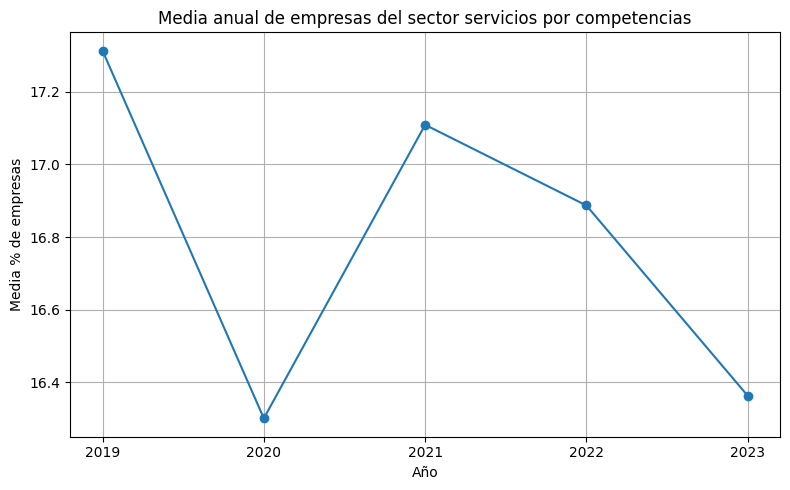

In [5]:
# Calcular la media anual
media_anual = df_todos_los_años.groupby("Año")["EMPRESAS SECTOR SERVICIOS"].mean().reset_index()

# Asegurar que el eje X use años como strings para etiquetas limpias
media_anual["Año"] = media_anual["Año"].astype(int).astype(str)

# Crear el gráfico
plt.figure(figsize=(8, 5))
plt.plot(media_anual["Año"], media_anual["EMPRESAS SECTOR SERVICIOS"], marker='o', linestyle='-')
plt.title("Media anual de empresas del sector servicios por competencias")
plt.xlabel("Año")
plt.ylabel("Media % de empresas")
plt.grid(True)
plt.tight_layout()
plt.show()

### Grafico media competencias por año barras

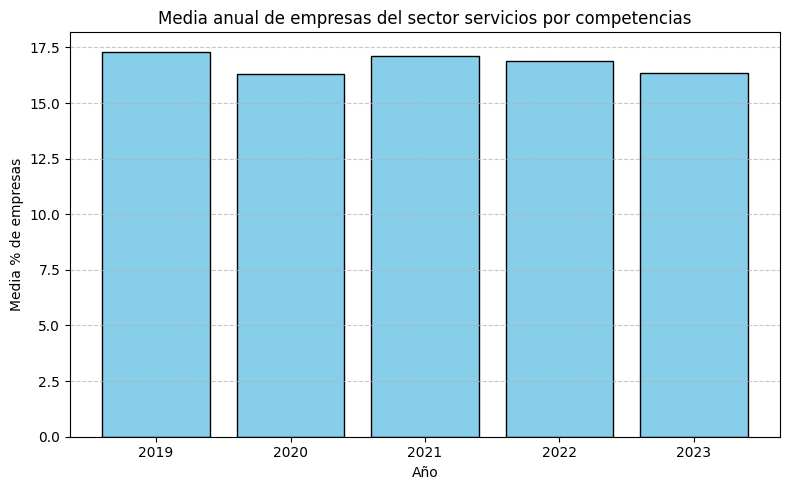

In [6]:
# Calcular la media anual
media_anual = df_todos_los_años.groupby("Año")["EMPRESAS SECTOR SERVICIOS"].mean().reset_index()

# Crear gráfico de columnas
plt.figure(figsize=(8, 5))
plt.bar(media_anual["Año"].astype(str), media_anual["EMPRESAS SECTOR SERVICIOS"], color='skyblue', edgecolor='black')
plt.title("Media anual de empresas del sector servicios por competencias")
plt.xlabel("Año")
plt.ylabel("Media % de empresas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Grafico barras de cada competencia por año

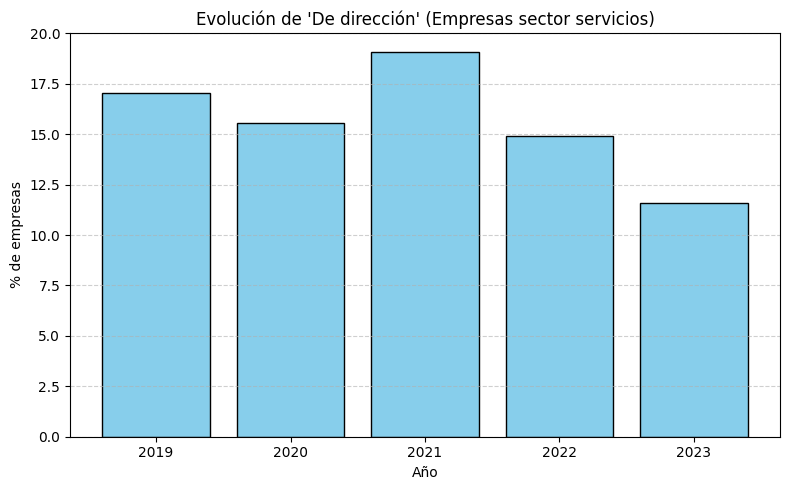

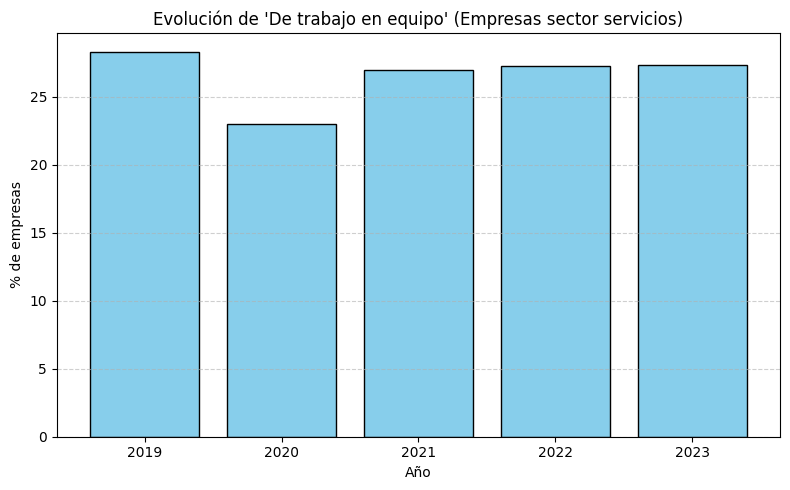

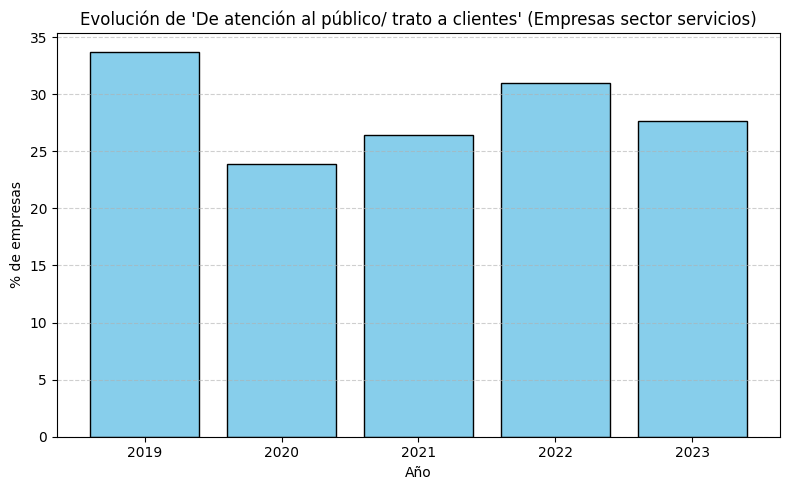

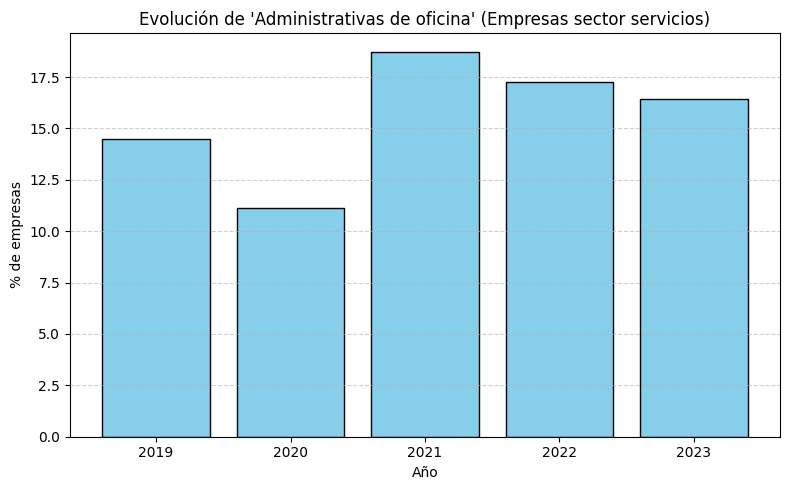

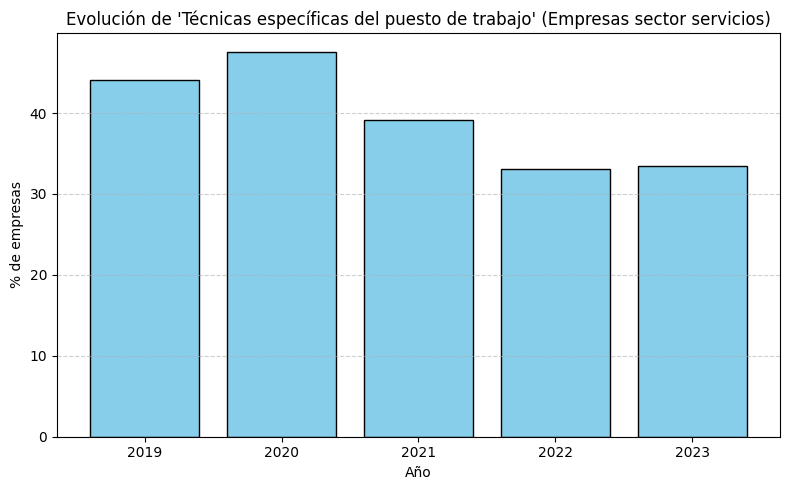

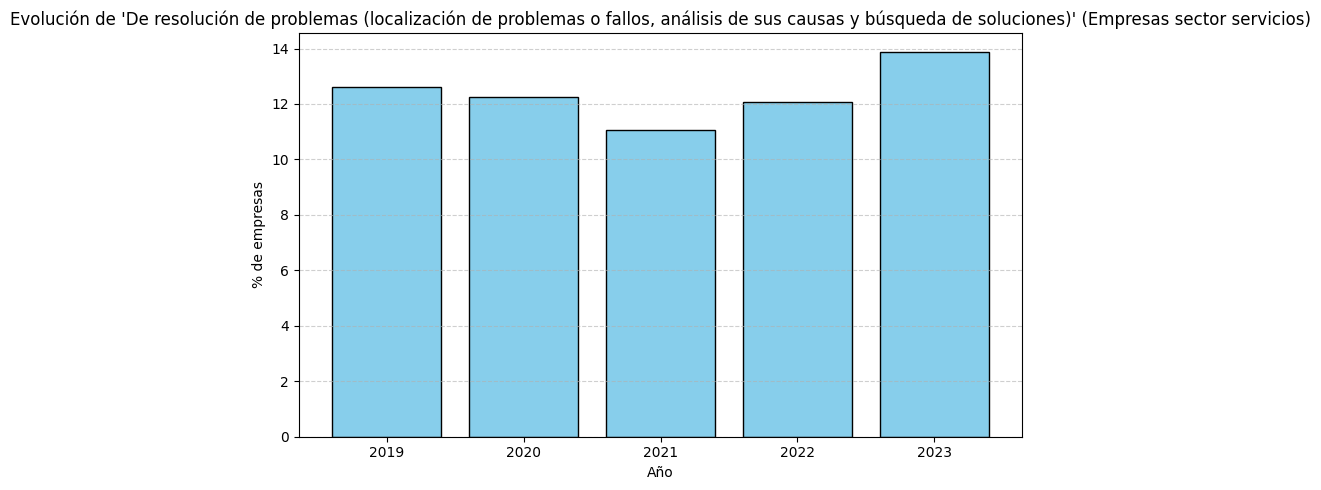

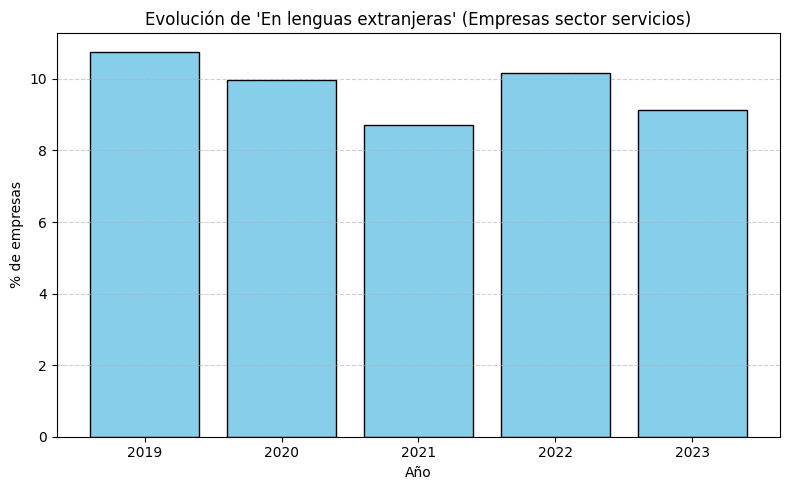

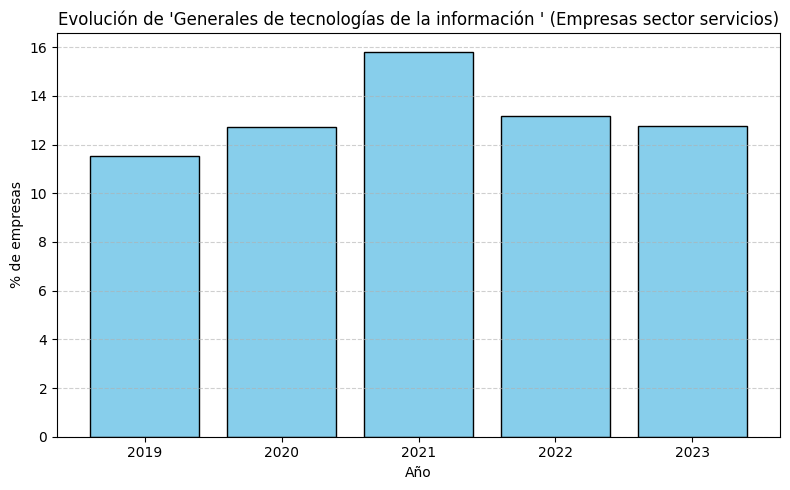

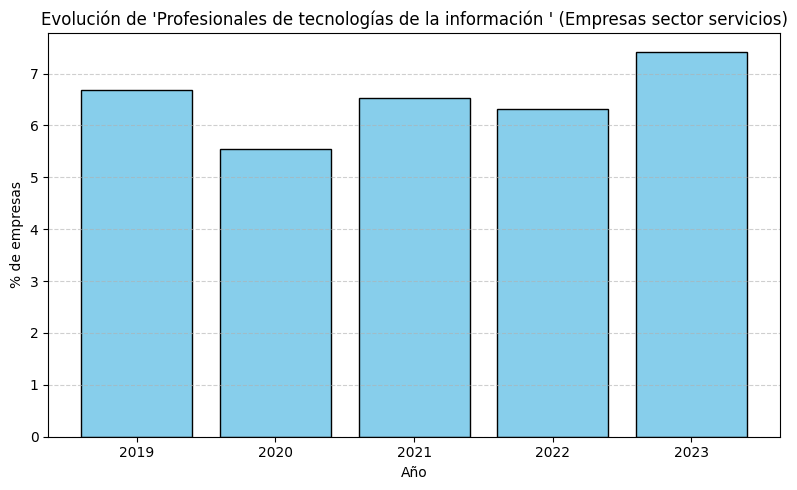

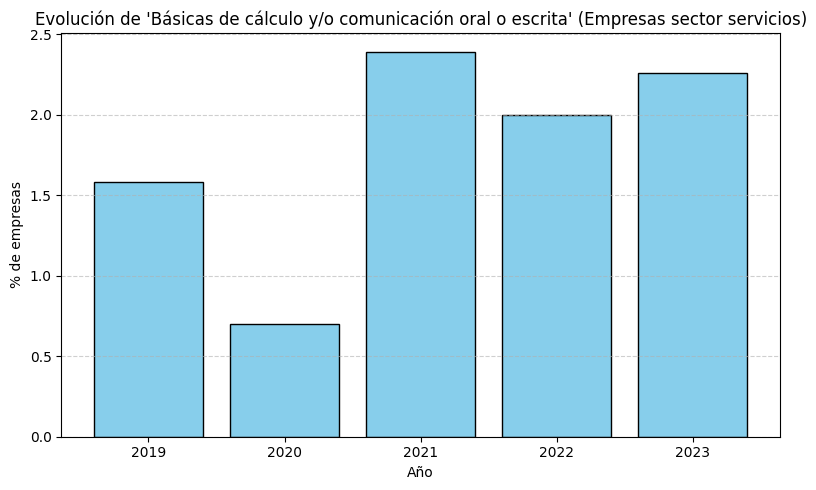

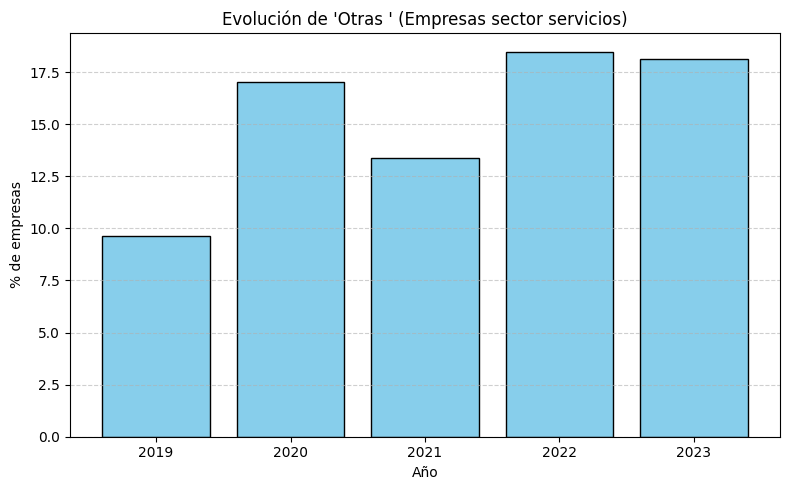

In [7]:
# Iterar por cada competencia
for competencia in df_todos_los_años['Competencias'].unique():
    df_comp = df_todos_los_años[df_todos_los_años['Competencias'] == competencia]
    df_comp = df_comp.sort_values(by='Año')

    plt.figure(figsize=(8, 5))
    plt.bar(df_comp['Año'].astype(str), df_comp['EMPRESAS SECTOR SERVICIOS'], color='skyblue', edgecolor='black')
    plt.title(f"Evolución de '{competencia}' (Empresas sector servicios)")
    plt.xlabel("Año")
    plt.ylabel("% de empresas")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### Mismo grafico pero con la cantidad encima de la columna

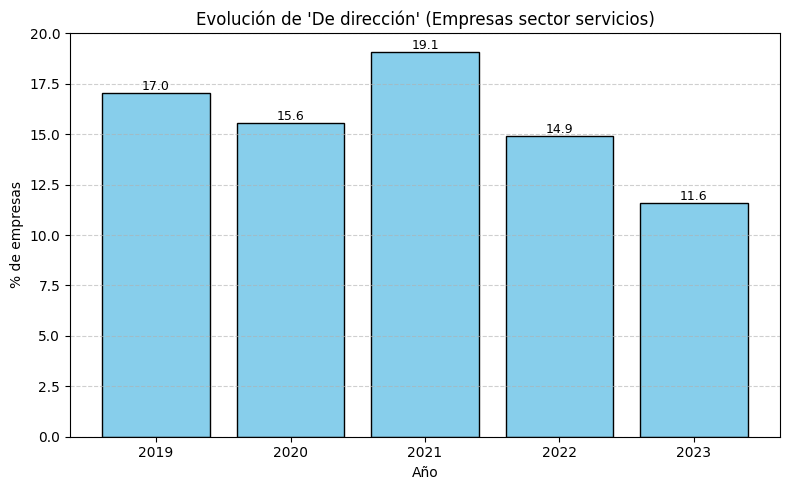

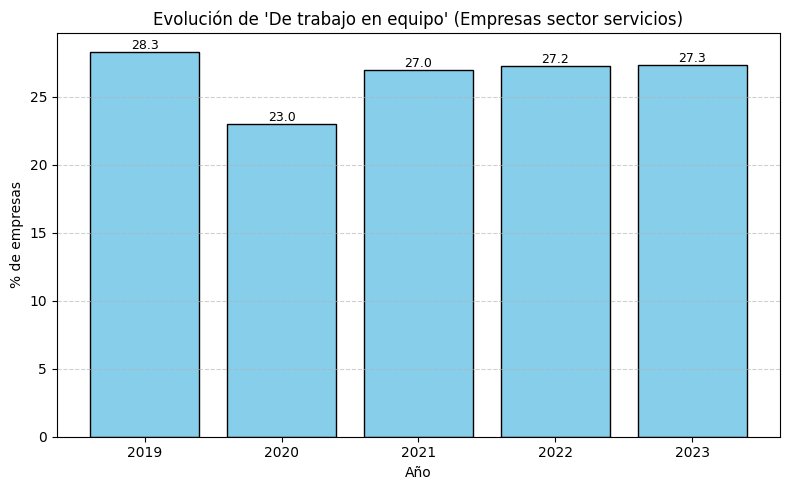

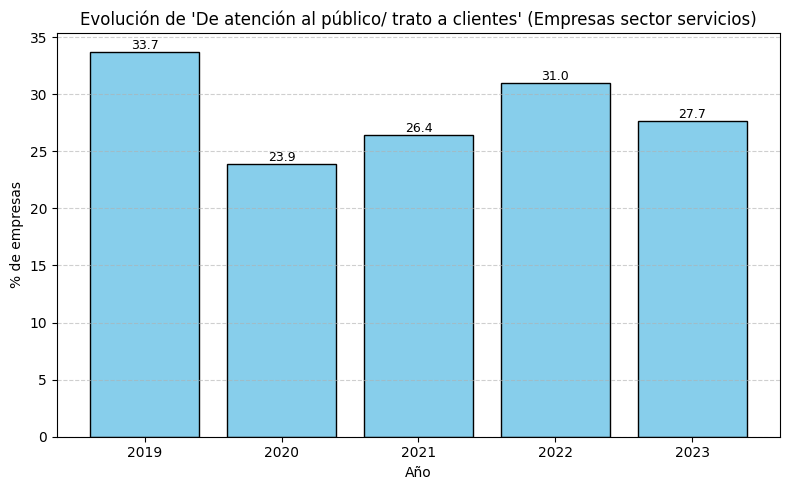

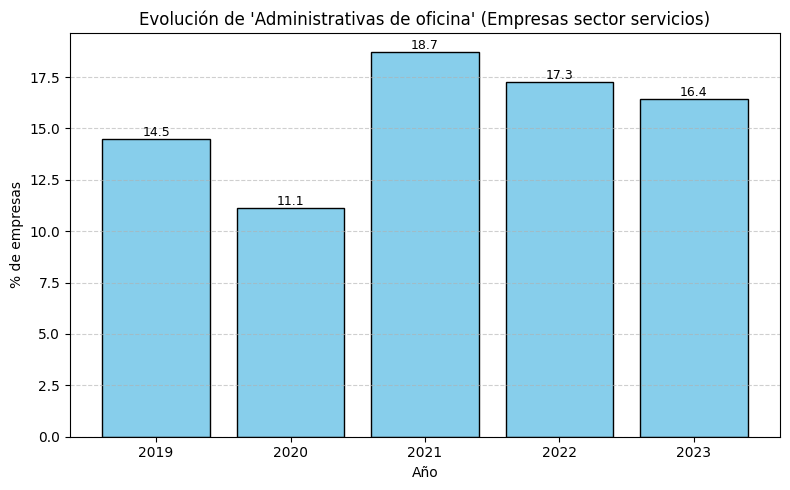

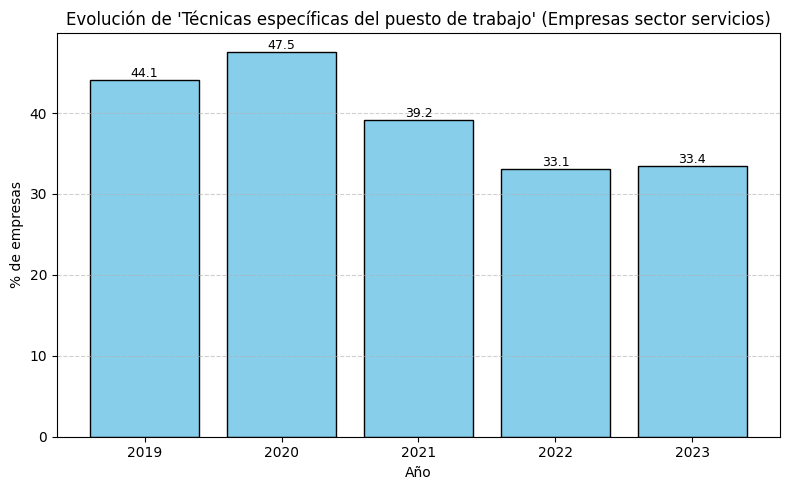

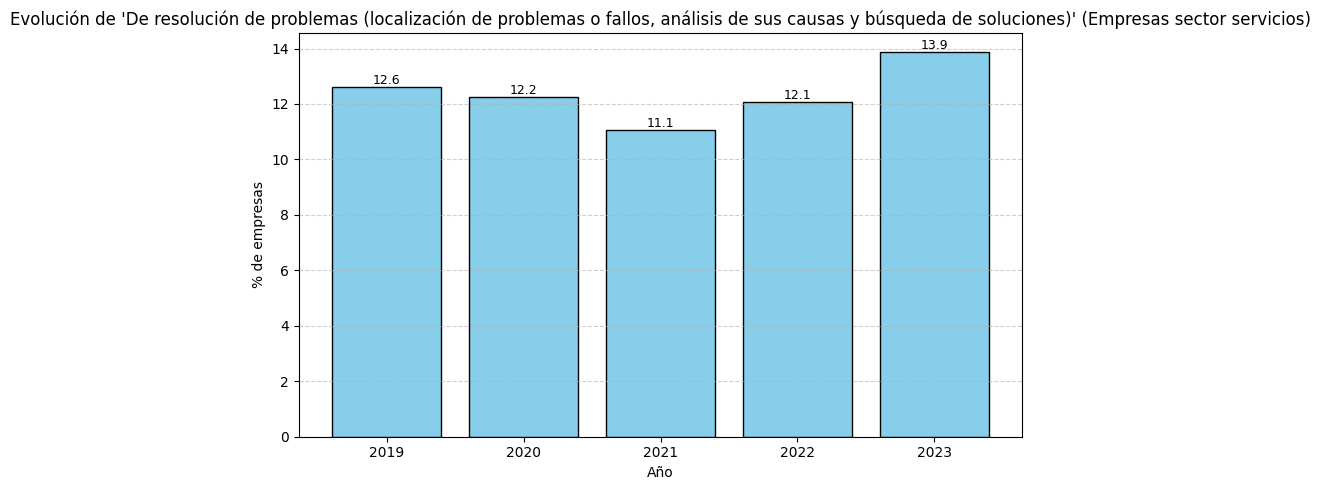

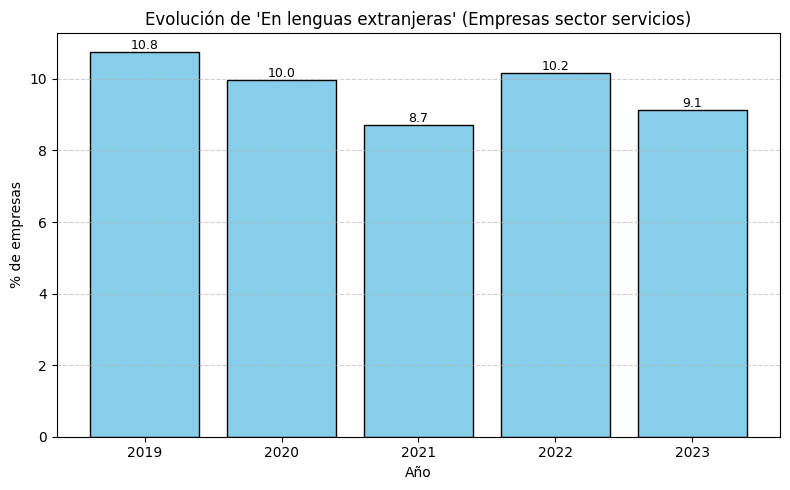

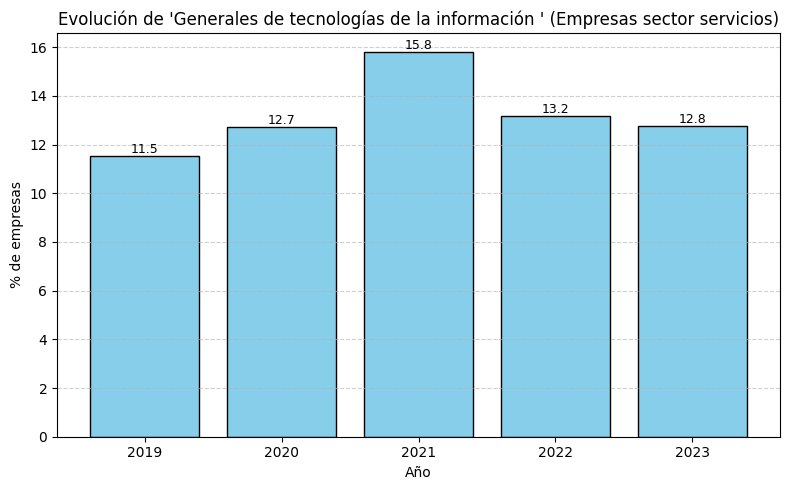

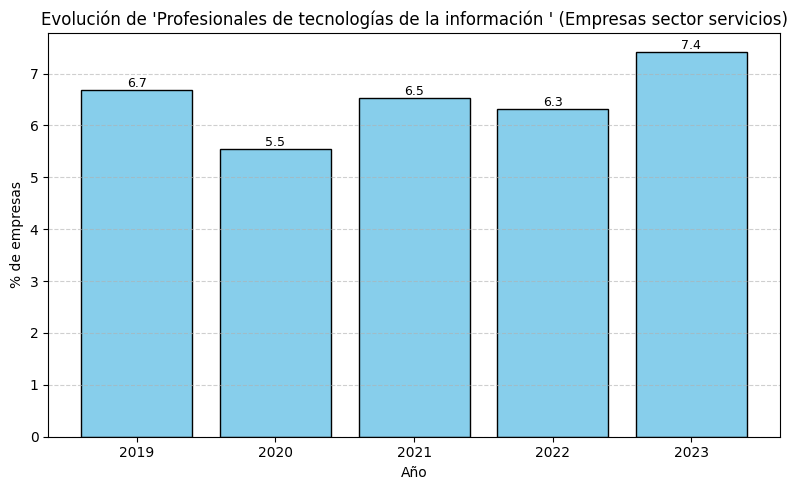

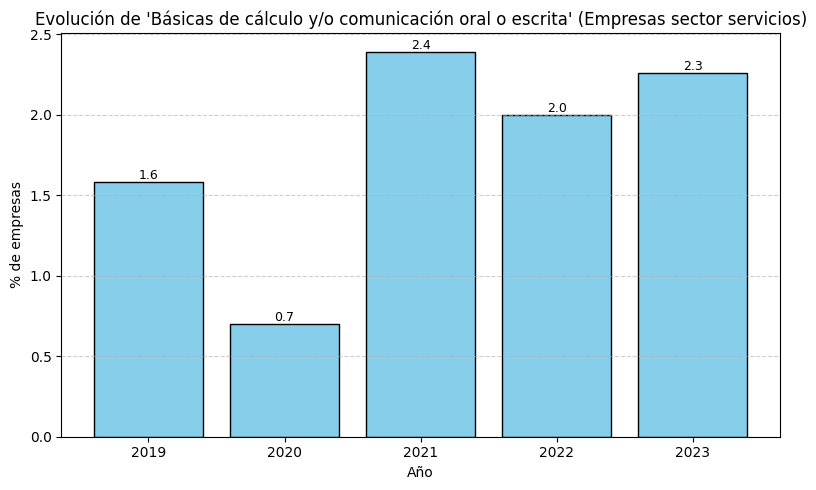

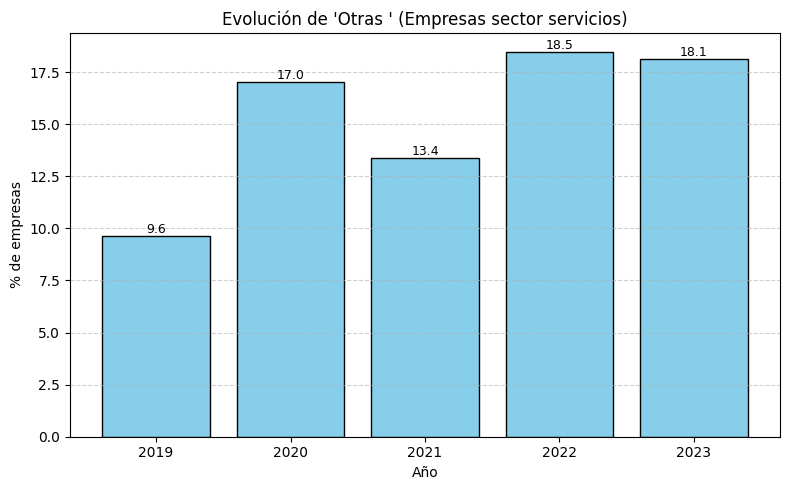

In [8]:
# Iterar por cada competencia
for competencia in df_todos_los_años['Competencias'].unique():
    df_comp = df_todos_los_años[df_todos_los_años['Competencias'] == competencia]
    df_comp = df_comp.sort_values(by='Año')

    plt.figure(figsize=(8, 5))
    bars = plt.bar(df_comp['Año'].astype(str), df_comp['EMPRESAS SECTOR SERVICIOS'], color='skyblue', edgecolor='black')
    
    # Añadir valor encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.title(f"Evolución de '{competencia}' (Empresas sector servicios)")
    plt.xlabel("Año")
    plt.ylabel("% de empresas")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### Mismo grafico pero añadiendo linea temporal

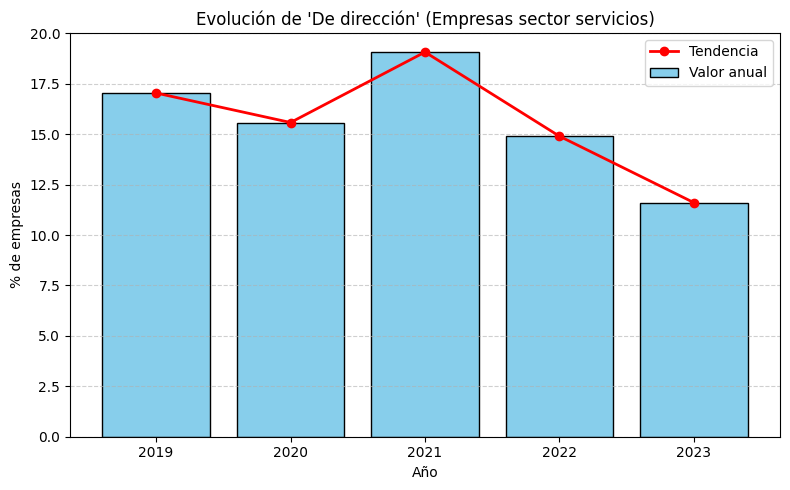

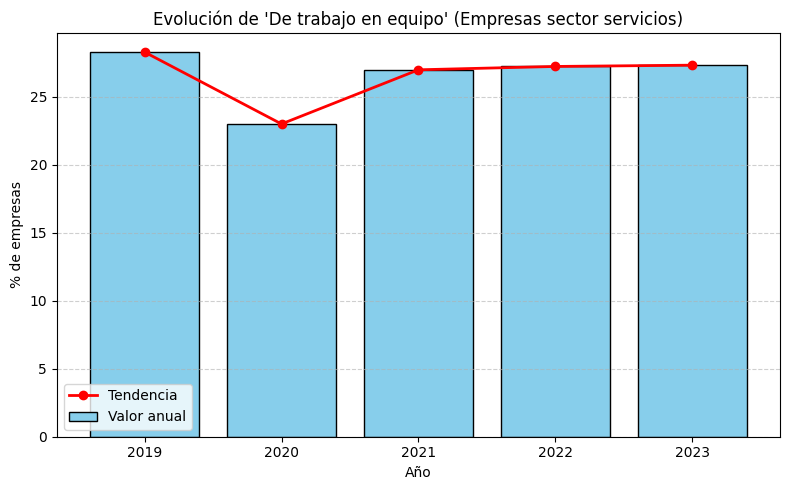

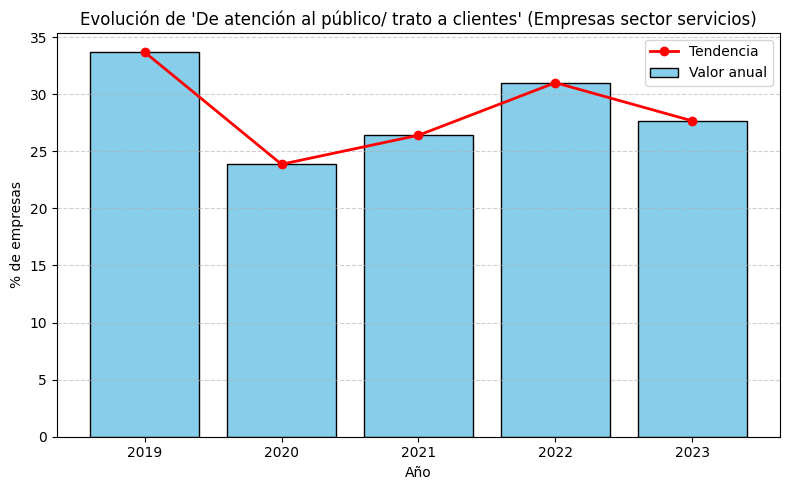

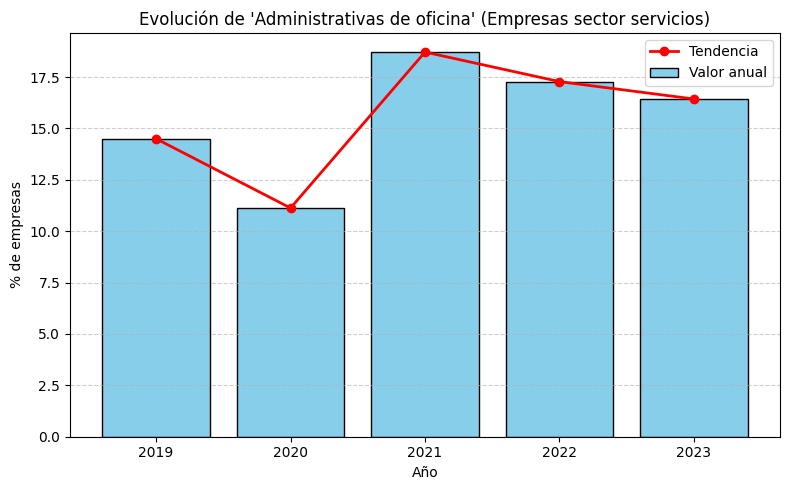

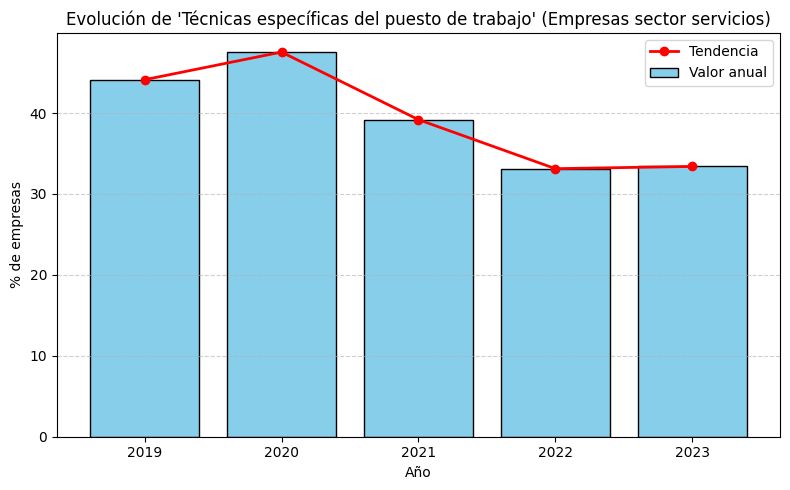

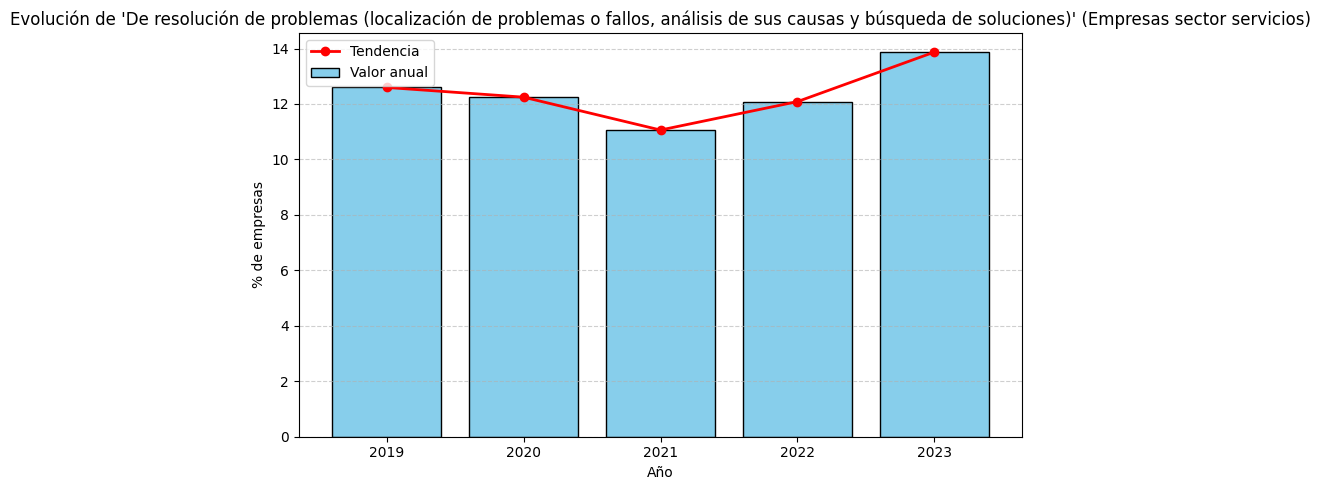

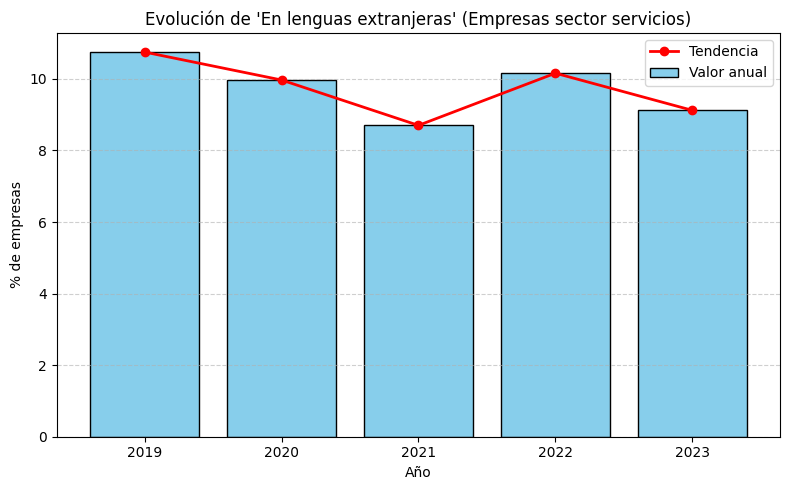

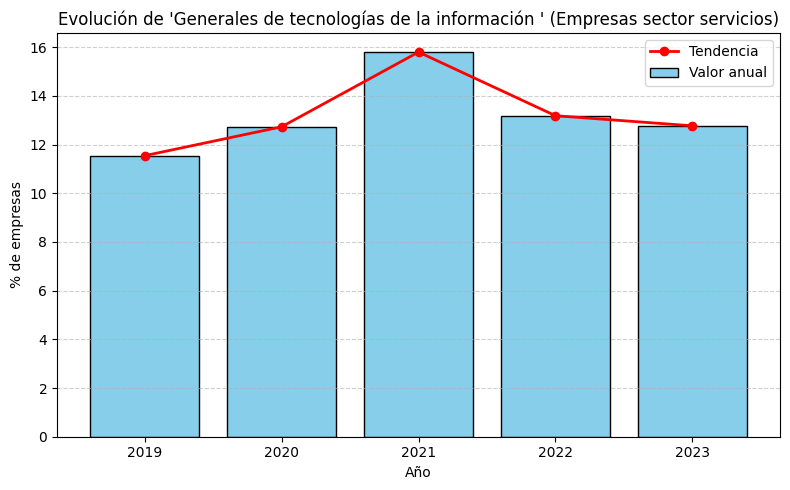

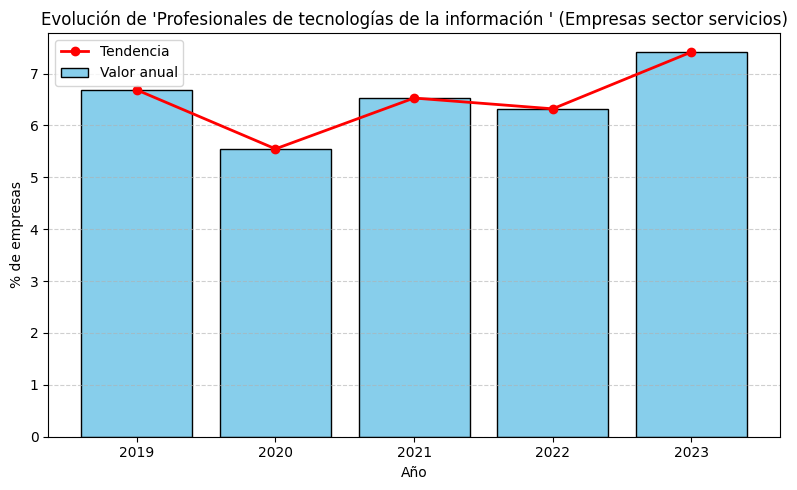

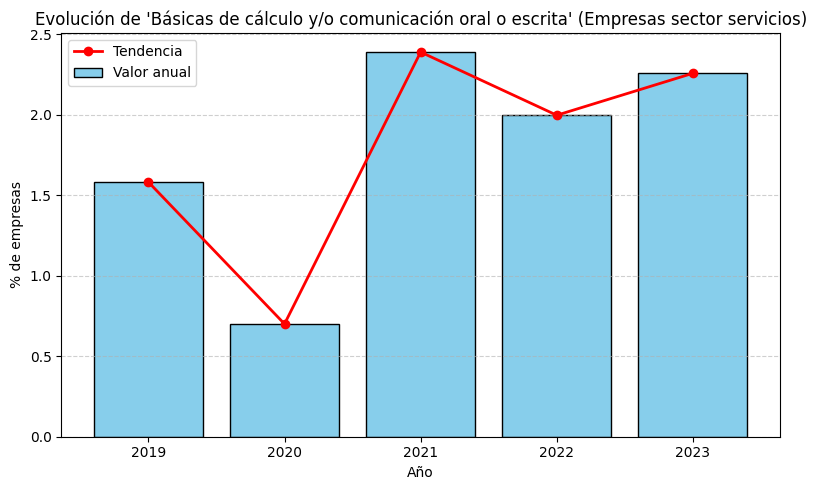

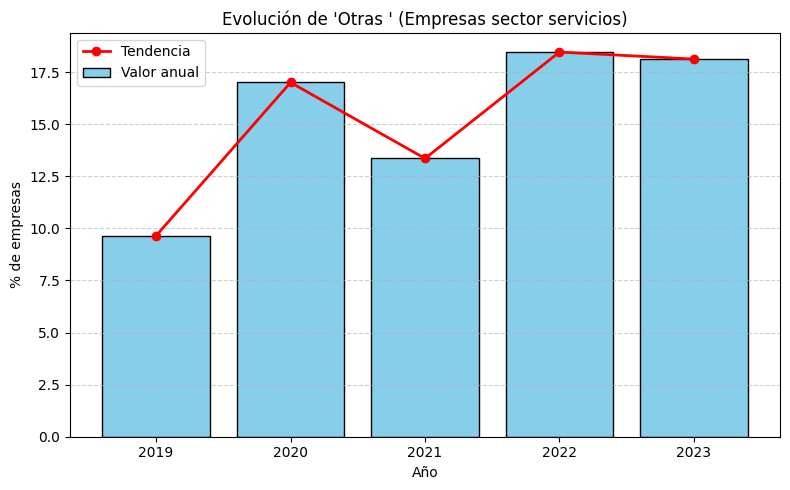

In [9]:
# Iterar por cada competencia
for competencia in df_todos_los_años['Competencias'].unique():
    df_comp = df_todos_los_años[df_todos_los_años['Competencias'] == competencia]
    df_comp = df_comp.sort_values(by='Año')

    años = df_comp['Año'].astype(str)
    valores = df_comp['EMPRESAS SECTOR SERVICIOS']

    plt.figure(figsize=(8, 5))
    
    # Barras
    plt.bar(años, valores, color='skyblue', edgecolor='black', label='Valor anual')

    # Línea roja conectando los puntos
    plt.plot(años, valores, color='red', marker='o', linewidth=2, label='Tendencia')

    plt.title(f"Evolución de '{competencia}' (Empresas sector servicios)")
    plt.xlabel("Año")
    plt.ylabel("% de empresas")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

### el mismo grafico pero añadiendo cantidades encima de la columna

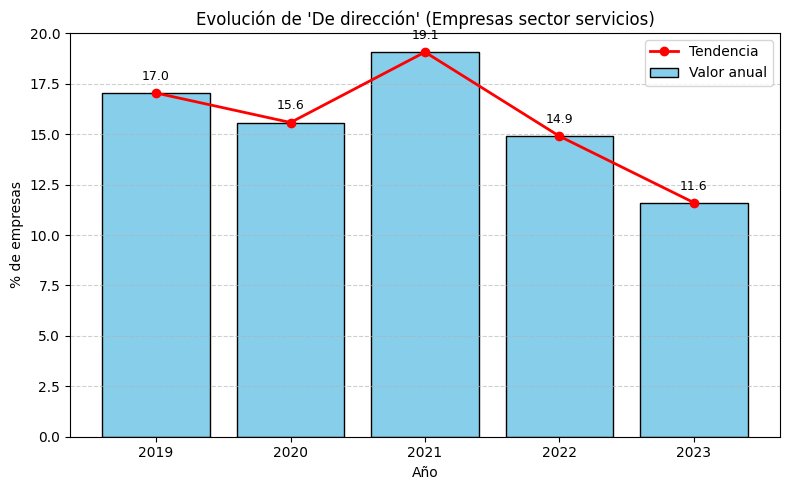

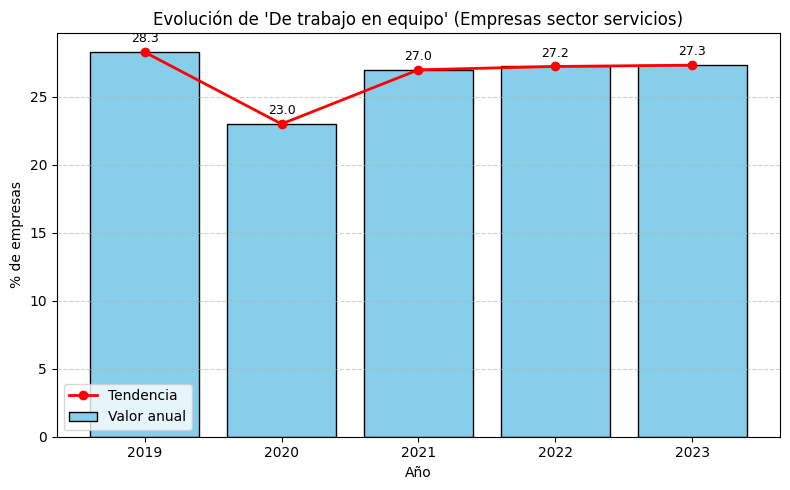

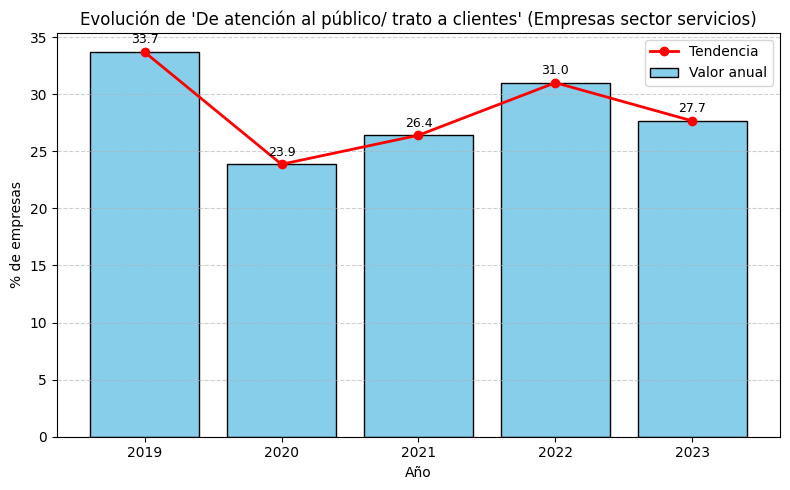

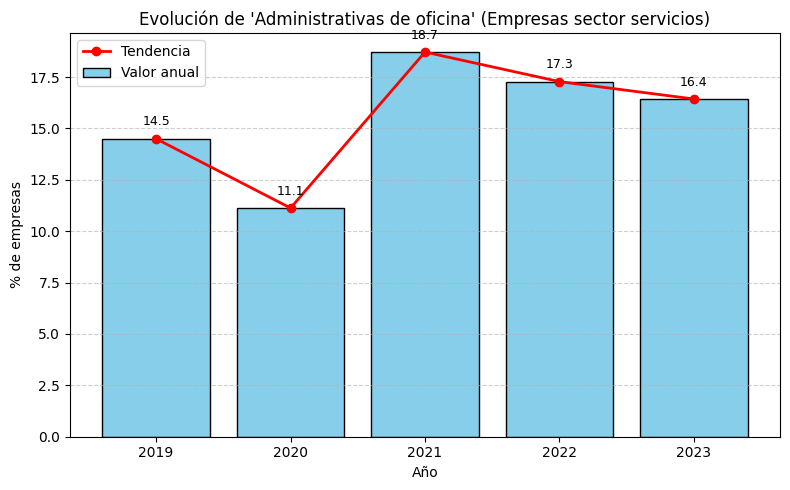

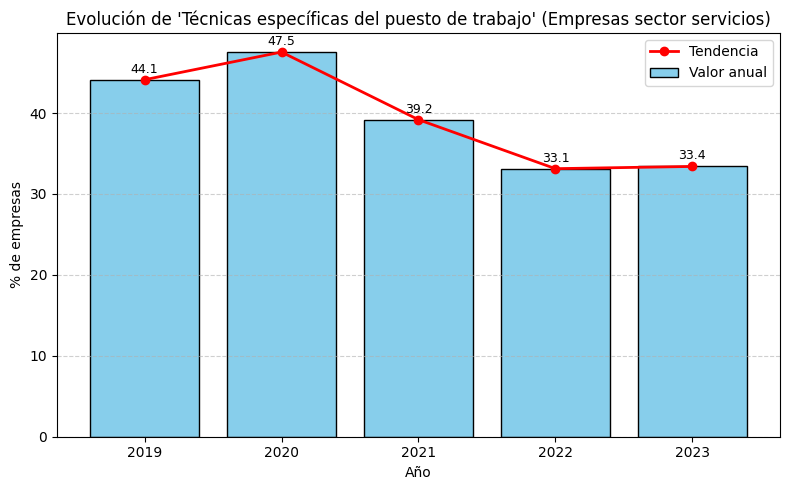

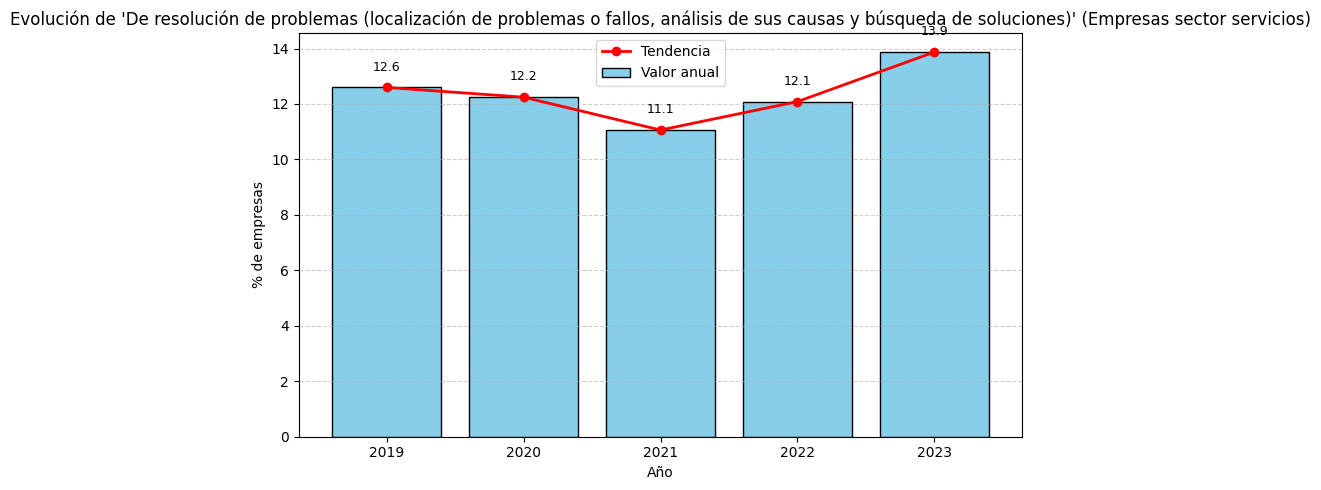

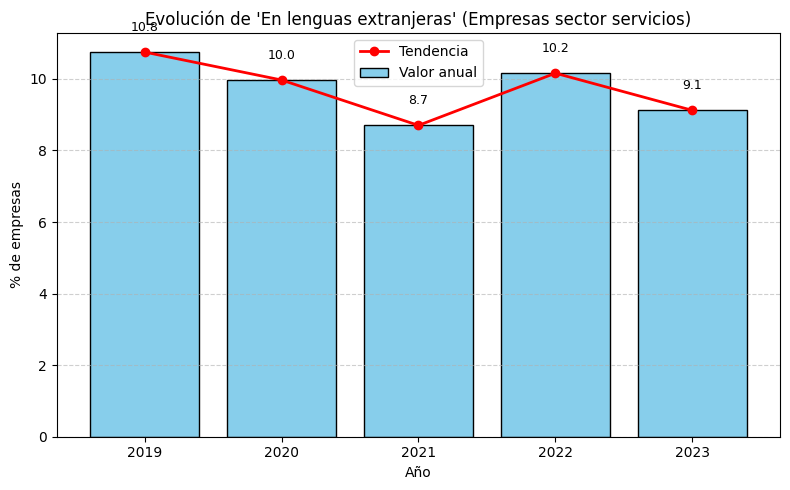

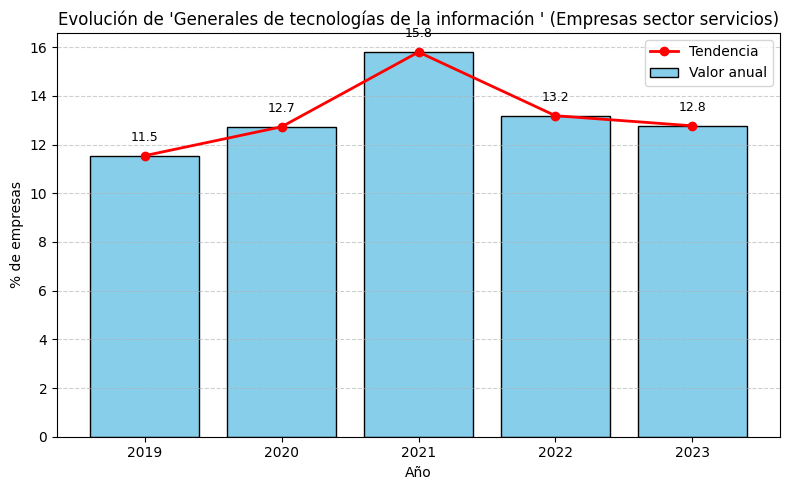

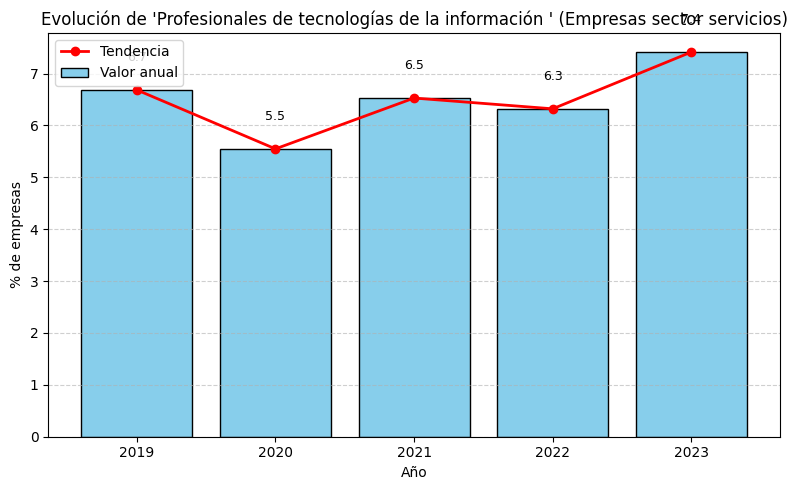

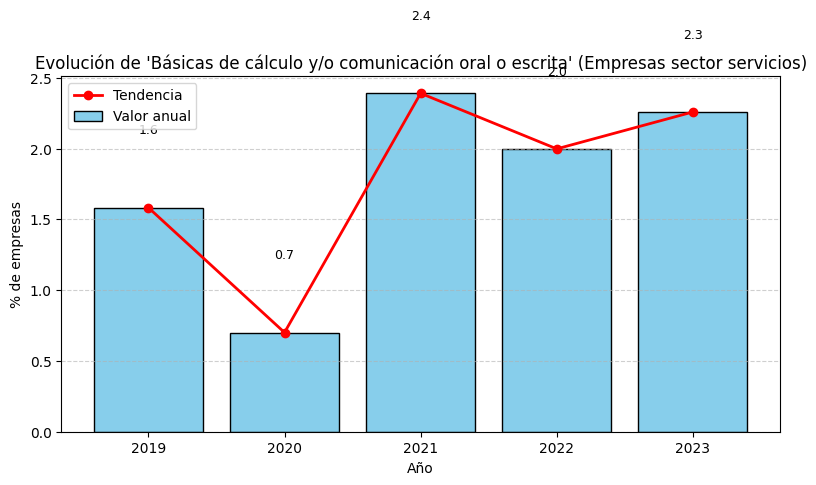

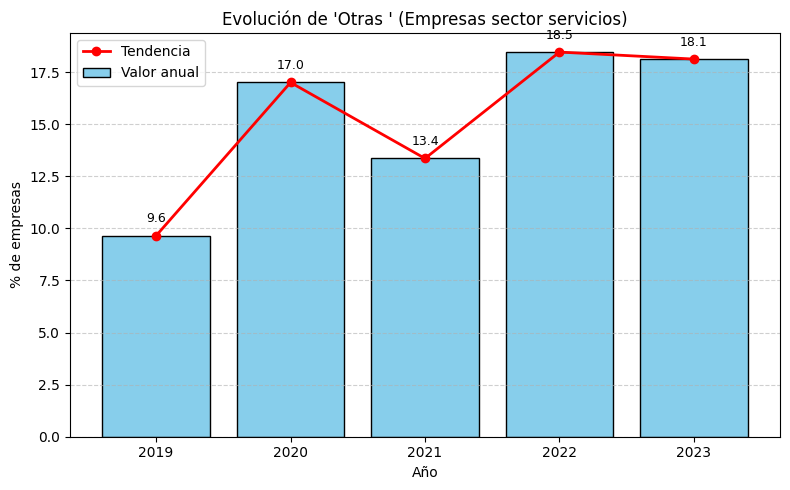

In [10]:
# Iterar por cada competencia
for competencia in df_todos_los_años['Competencias'].unique():
    df_comp = df_todos_los_años[df_todos_los_años['Competencias'] == competencia]
    df_comp = df_comp.sort_values(by='Año')

    años = df_comp['Año'].astype(str)
    valores = df_comp['EMPRESAS SECTOR SERVICIOS']

    plt.figure(figsize=(8, 5))
    
    # Barras
    barras = plt.bar(años, valores, color='skyblue', edgecolor='black', label='Valor anual')

    # Línea roja conectando los puntos
    plt.plot(años, valores, color='red', marker='o', linewidth=2, label='Tendencia')

    # Etiquetas encima de cada barra
    for barra, valor in zip(barras, valores):
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 0.5,
                 f'{valor:.1f}', ha='center', va='bottom', fontsize=9)

    plt.title(f"Evolución de '{competencia}' (Empresas sector servicios)")
    plt.xlabel("Año")
    plt.ylabel("% de empresas")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Grafico linea temporal de los 5 campos resumidos

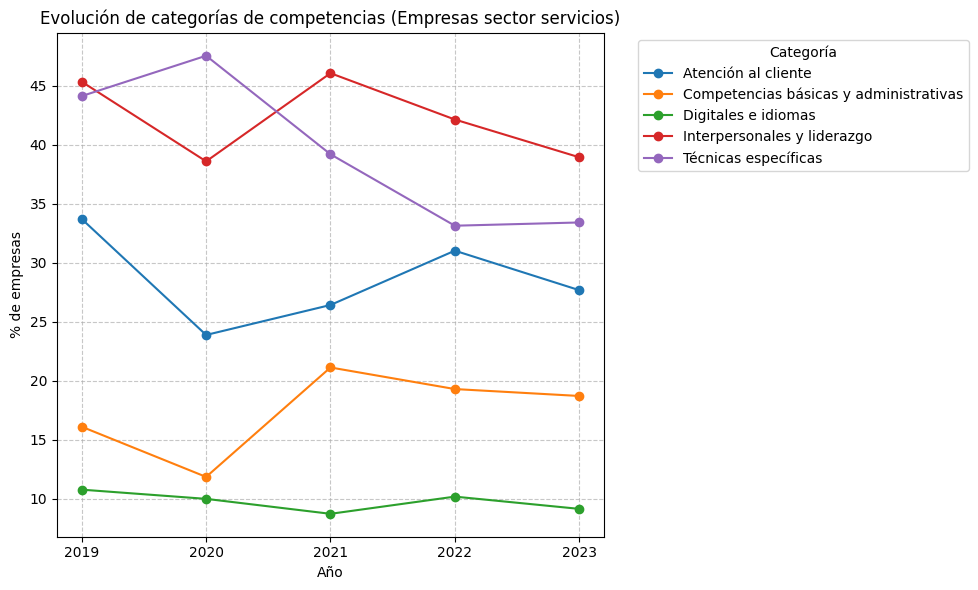

In [11]:
# Diccionario de mapeo de competencias a categorías
mapeo_categorias = {
    'De dirección': 'Interpersonales y liderazgo',
    'De trabajo en equipo': 'Interpersonales y liderazgo',
    'Técnicas específicas del puesto de trabajo': 'Técnicas específicas',
    'De atención al público/ trato a clientes': 'Atención al cliente',
    'Administrativas de oficina': 'Competencias básicas y administrativas',
    'Básicas de cálculo y/o comunicación oral o escrita': 'Competencias básicas y administrativas',
    'De resolución de problemas (localización de problemas, reparación, etc.)': 'Técnicas específicas',
    'En lenguas extranjeras': 'Digitales e idiomas',
    'Generales de tecnologías de la información': 'Digitales e idiomas',
    'Profesionales de tecnologías de la información': 'Digitales e idiomas',
    'Otras': 'Otras'
}

# Asignar categoría al DataFrame
df_sector_servicios['Categoría'] = df_sector_servicios['Competencias'].map(mapeo_categorias)

# Agrupar por año y categoría
df_lineas = df_sector_servicios.groupby(['Año', 'Categoría'])['EMPRESAS SECTOR SERVICIOS'].sum().unstack().fillna(0)

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
for categoria in df_lineas.columns:
    plt.plot(df_lineas.index, df_lineas[categoria], marker='o', label=categoria)

plt.title("Evolución de categorías de competencias (Empresas sector servicios)")
plt.xlabel("Año")
plt.ylabel("% de empresas")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_lineas.index.astype(int))
plt.tight_layout()
plt.show()

### Grafico linea temporal de las 10 competencias

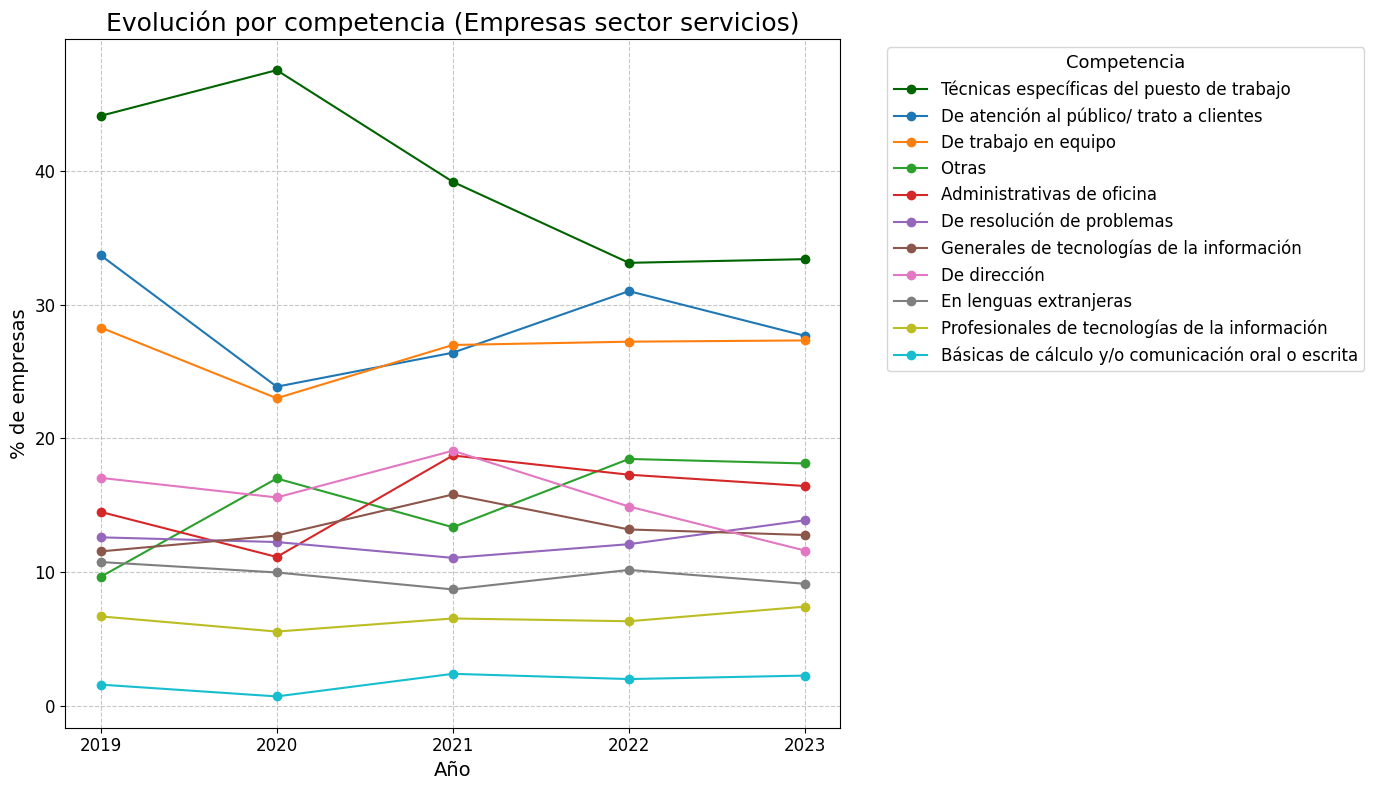

In [19]:
# Crear una copia para no modificar el original
df_plot = df_sector_servicios.copy()

# Renombrar la competencia larga
df_plot["Competencias"] = df_plot["Competencias"].replace(
    {"De resolución de problemas (localización de problemas o fallos, análisis de sus causas y búsqueda de soluciones)": 
     "De resolución de problemas"}
)

# Crear tabla pivote con Año como índice y competencias como columnas
df_lineas_individuales = df_plot.pivot_table(
    index='Año',
    columns='Competencias',
    values='EMPRESAS SECTOR SERVICIOS',
    aggfunc='mean'
).sort_index()

# Obtener el orden de las competencias según el valor en el último año (2023), de mayor a menor
ultimo_anyo = df_lineas_individuales.index.max()
orden_competencias = df_lineas_individuales.loc[ultimo_anyo].sort_values(ascending=False).index.tolist()

# Crear gráfico
plt.figure(figsize=(14, 8))  # Más grande para proyección

for competencia in orden_competencias:
    color = 'darkgreen' if competencia == "Técnicas específicas del puesto de trabajo" else None
    plt.plot(
        df_lineas_individuales.index,
        df_lineas_individuales[competencia],
        marker='o',
        label=competencia,
        color=color
    )

# Títulos y etiquetas grandes
plt.title("Evolución por competencia (Empresas sector servicios)", fontsize=18)
plt.xlabel("Año", fontsize=14)
plt.ylabel("% de empresas", fontsize=14)

# Ejes con números grandes
plt.xticks(df_lineas_individuales.index.astype(int), fontsize=12)
plt.yticks(fontsize=12)

# Rejilla
plt.grid(True, linestyle='--', alpha=0.7)

# Leyenda con el orden correcto
plt.legend(title="Competencia", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()

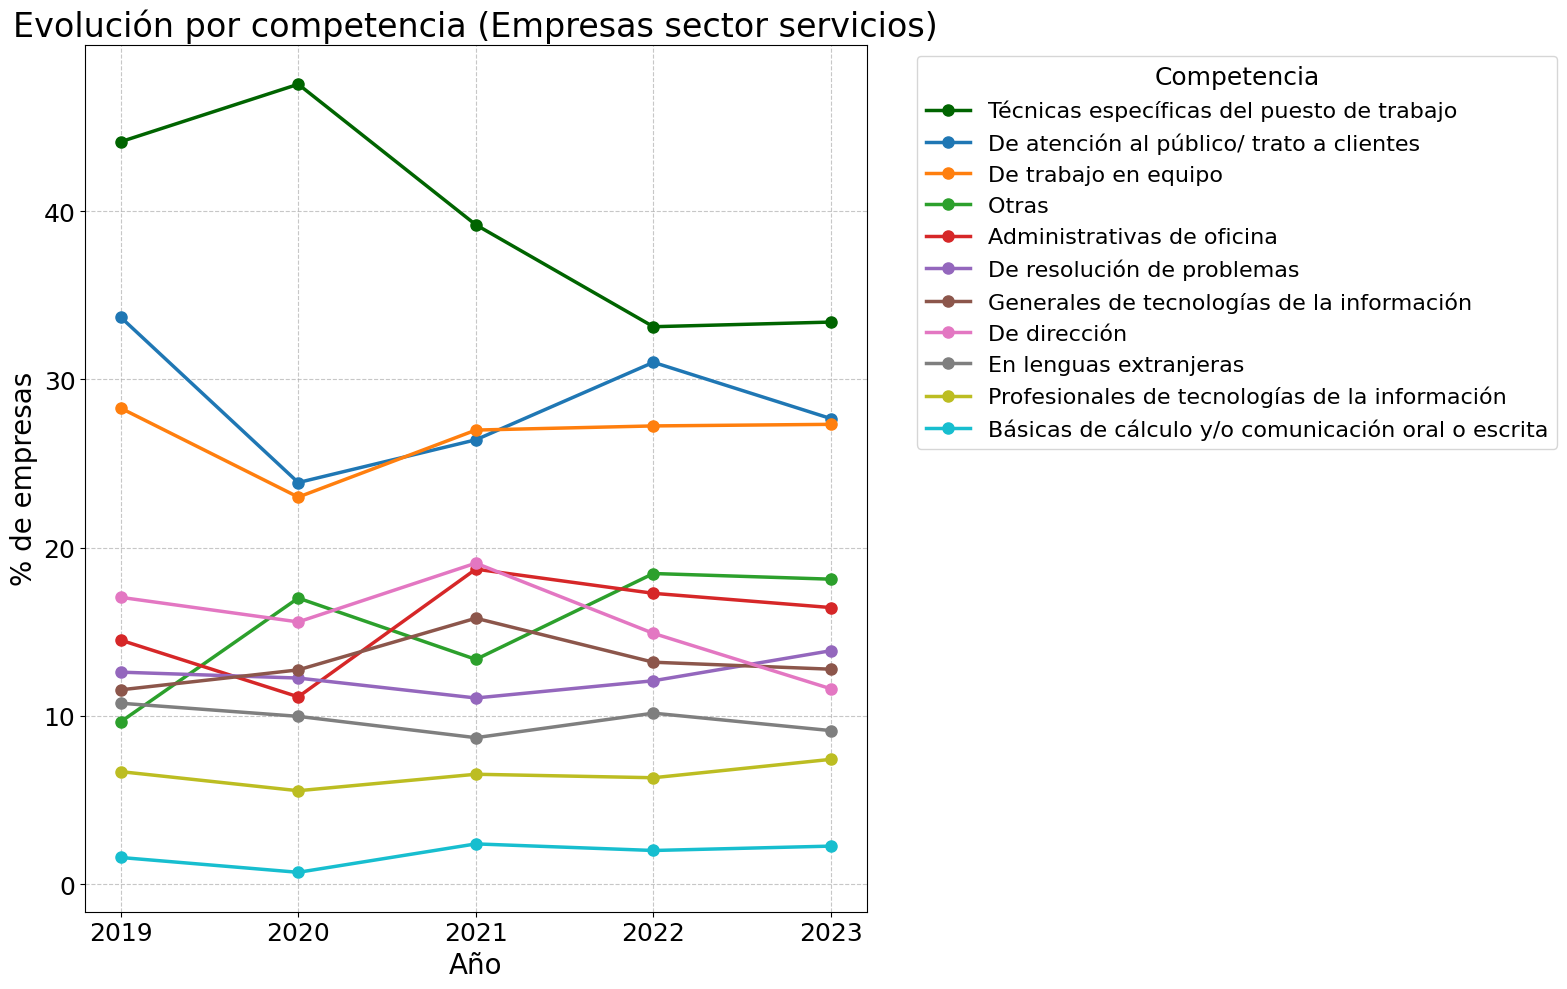

In [20]:
# Crear una copia para no modificar el original
df_plot = df_sector_servicios.copy()

# Renombrar la competencia larga
df_plot["Competencias"] = df_plot["Competencias"].replace(
    {"De resolución de problemas (localización de problemas o fallos, análisis de sus causas y búsqueda de soluciones)": 
     "De resolución de problemas"}
)

# Crear tabla pivote con Año como índice y competencias como columnas
df_lineas_individuales = df_plot.pivot_table(
    index='Año',
    columns='Competencias',
    values='EMPRESAS SECTOR SERVICIOS',
    aggfunc='mean'
).sort_index()

# Obtener el orden de las competencias según el valor en el último año (2023), de mayor a menor
ultimo_anyo = df_lineas_individuales.index.max()
orden_competencias = df_lineas_individuales.loc[ultimo_anyo].sort_values(ascending=False).index.tolist()

# Crear gráfico
plt.figure(figsize=(16, 10))  # Más grande para proyección o impresión

for competencia in orden_competencias:
    color = 'darkgreen' if competencia == "Técnicas específicas del puesto de trabajo" else None
    plt.plot(
        df_lineas_individuales.index,
        df_lineas_individuales[competencia],
        marker='o',
        label=competencia,
        color=color,
        linewidth=2.5,
        markersize=8
    )

# Títulos y etiquetas grandes
plt.title("Evolución por competencia (Empresas sector servicios)", fontsize=24)
plt.xlabel("Año", fontsize=20)
plt.ylabel("% de empresas", fontsize=20)

# Ejes con números grandes
plt.xticks(df_lineas_individuales.index.astype(int), fontsize=18)
plt.yticks(fontsize=18)

# Rejilla
plt.grid(True, linestyle='--', alpha=0.7)

# Leyenda más grande y ordenada
plt.legend(
    title="Competencia",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=16,
    title_fontsize=18
)

plt.tight_layout()
plt.show()